> RoyChao

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
sns.set( style="ticks" )
from sklearn.preprocessing import MinMaxScaler

## 3-0 3_days

In [3]:
df_dataset = pd.read_csv("data/2_df2_elec.csv", index_col=0)
#df_dataset = pd.read_csv("data/2_df2_5day_elec.csv", index_col=0)
#df_dataset = pd.read_csv("data/2_df2_7day_elec.csv", index_col=0)
#df_dataset = pd.read_csv("data/2_df2_14day_elec.csv", index_col=0)

min_max_scaler = MinMaxScaler()

min_max_scaler.fit(df_dataset[[
        's_min', 's_max', 's_skew', 's_kurt',
        'd_min', 'd_max', 'd_skew', 'd_kurt',
        'i_min', 'i_max', 'i_skew', 'i_kurt',
        'c_min', 'c_max', 'c_skew', 'c_kurt',]])
print(f'min: {min_max_scaler.data_min_}')
print(f'max: {min_max_scaler.data_max_}')

df_dataset[[
        's_min', 's_max', 's_skew', 's_kurt',
        'd_min', 'd_max', 'd_skew', 'd_kurt',
        'i_min', 'i_max', 'i_skew', 'i_kurt',
        'c_min', 'c_max', 'c_skew', 'c_kurt',]] = min_max_scaler.fit_transform(
            df_dataset[[
        's_min', 's_max', 's_skew', 's_kurt',
        'd_min', 'd_max', 'd_skew', 'd_kurt',
        'i_min', 'i_max', 'i_skew', 'i_kurt',
        'c_min', 'c_max', 'c_skew', 'c_kurt',]]
        )

df_train = df_dataset.iloc[0:382]
df_test = df_dataset.iloc[382:392]

train_x = df_train.drop(columns=['OR', 'date'])
train_y = df_train['OR']

test_x = df_test.drop(columns=['OR', 'date'])
test_y = df_test['OR']

# We will try a lot of models later

from sklearn.model_selection import GridSearchCV                     
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR, LinearSVC, NuSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
classifiers = [
    KNeighborsRegressor(),
    SVR(),
    NuSVR(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    AdaBoostRegressor(),
    GradientBoostingRegressor()
]

# 模型訓練

from sklearn.model_selection import KFold             # 匯入 K 次交叉驗證工具
from sklearn.tree import DecisionTreeClassifier       # 匯入決策樹模型
from sklearn.metrics import accuracy_score            # 匯入準確度計算工具
from sklearn.metrics import mean_squared_error

kf = KFold(n_splits=5,                                # 設定 K 值
           random_state=1012,
           shuffle=True)
kf.get_n_splits(train_x)                              # 給予資料範圍


train_acc_list = []                                   # 儲存每次訓練模型的準確度
valid_acc_list = []                                   # 儲存每次驗證模型的準確度
best = []
avg = []

# train_index = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
# valid_index = [21, 22, 23, 24, 25, 26, 27, 28]

for clf in classifiers:
  for train_index, valid_index in kf.split(train_x):    # 每個迴圈都會產生不同部份的資料
    train_x_split = train_x.iloc[train_index]         # 產生訓練資料
    train_y_split = train_y.iloc[train_index]         # 產生訓練資料標籤
    valid_x_split = train_x.iloc[valid_index]         # 產生驗證資料
    valid_y_split = train_y.iloc[valid_index]         # 產生驗證資料標籤

    clf.fit(train_x_split, train_y_split)             # 訓練決策樹模型
    
    train_pred_y = clf.predict(train_x_split)         # 確認模型是否訓練成功
    train_acc = mean_squared_error(train_y_split, train_pred_y) / len(train_y_split)

    valid_pred_y = clf.predict(valid_x_split)         # 驗證模型是否訓練成功
    valid_acc = mean_squared_error(valid_y_split, valid_pred_y) / len(valid_y_split)
    
    train_acc_list.append(train_acc)
    valid_acc_list.append(valid_acc)

  print( clf.__class__.__name__ )        # print classifier's name
    # print("train MSE: ", train_acc)
    # print("test MSE: ", valid_acc)
    
  print((
    'average train MSE: {}\n' +
    '    min train MSE: {}\n' +
    '    max train MSE: {}\n' +
    'average valid MSE: {}\n' +
    '    min valid MSE: {}\n' +
    '    max valid MSE: {}').format(
    np.mean(train_acc_list),                          # 輸出平均訓練準確度
    np.min(train_acc_list),                           # 輸出最低訓練準確度
    np.max(train_acc_list),                           # 輸出最高訓練準確度
    np.mean(valid_acc_list),                          # 輸出平均驗證準確度
    np.min(valid_acc_list),                           # 輸出最低驗證準確度
    np.max(valid_acc_list)                            # 輸出最高驗證準確度
  ))

  best.append(np.min(valid_acc_list))
  avg.append(np.mean(valid_acc_list))

  print("="*30)

min: [ 2.49050000e+04  2.49800000e+04 -7.07078945e-01 -1.50000000e+00
  2.19130000e+04  2.21330000e+04 -7.07019564e-01 -1.50000000e+00
  2.71573000e+02  2.77622000e+02 -7.07102404e-01 -1.50000000e+00
  1.99353000e+02  2.04331000e+02 -7.07102258e-01 -1.50000000e+00]
max: [ 4.24360000e+04  4.28780000e+04  7.07098466e-01 -1.50000000e+00
  3.81730000e+04  3.88440000e+04  7.07099319e-01 -1.50000000e+00
  7.33022000e+02  7.36267000e+02  7.07032490e-01 -1.50000000e+00
  4.05935000e+02  4.07732000e+02  7.07056044e-01 -1.50000000e+00]
KNeighborsRegressor
average train MSE: 1450.0429115882457
    min train MSE: 1229.9342073561452
    max train MSE: 1573.0793844247942
average valid MSE: 8807.563567689966
    min valid MSE: 6295.403185595567
    max valid MSE: 13555.306385041553
SVR
average train MSE: 2242.4521106295674
    min train MSE: 1229.9342073561452
    max train MSE: 3285.5569325084416
average valid MSE: 10481.297076724917
    min valid MSE: 6295.403185595567
    max valid MSE: 13651.6555

In [7]:
# 模型訓練

from sklearn.model_selection import KFold             # 匯入 K 次交叉驗證工具
from sklearn.tree import DecisionTreeClassifier       # 匯入決策樹模型
from sklearn.metrics import accuracy_score            # 匯入準確度計算工具
from sklearn.metrics import mean_squared_error, mean_absolute_error

kf = KFold(n_splits=5,                                # 設定 K 值
           random_state=1012,
           shuffle=True)
kf.get_n_splits(train_x)                              # 給予資料範圍


train_acc_list = []                                   # 儲存每次訓練模型的準確度
valid_acc_list = []                                   # 儲存每次驗證模型的準確度
best = []
avg = []

# train_index = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
# valid_index = [21, 22, 23, 24, 25, 26, 27, 28]
clf = GradientBoostingRegressor(random_state=19477, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=1)

for train_index, valid_index in kf.split(train_x):    # 每個迴圈都會產生不同部份的資料
  train_x_split = train_x.iloc[train_index]         # 產生訓練資料
  train_y_split = train_y.iloc[train_index]         # 產生訓練資料標籤
  valid_x_split = train_x.iloc[valid_index]         # 產生驗證資料
  valid_y_split = train_y.iloc[valid_index]         # 產生驗證資料標籤

  clf.fit(train_x_split, train_y_split)             # 訓練決策樹模型
  
  train_pred_y = clf.predict(train_x_split)         # 確認模型是否訓練成功
  train_acc = mean_squared_error(train_y_split, train_pred_y) / len(train_y_split)

  valid_pred_y = clf.predict(valid_x_split)         # 驗證模型是否訓練成功
  valid_acc = mean_squared_error(valid_y_split, valid_pred_y) / len(valid_y_split)
  
  train_acc_list.append(train_acc)
  valid_acc_list.append(valid_acc)

print( clf.__class__.__name__ )        # print classifier's name
  # print("train MSE: ", train_acc)
  # print("test MSE: ", valid_acc)
  
print((
  'average train MSE: {}\n' +
  '    min train MSE: {}\n' +
  '    max train MSE: {}\n' +
  'average valid MSE: {}\n' +
  '    min valid MSE: {}\n' +
  '    max valid MSE: {}').format(
  np.mean(train_acc_list),                          # 輸出平均訓練準確度
  np.min(train_acc_list),                           # 輸出最低訓練準確度
  np.max(train_acc_list),                           # 輸出最高訓練準確度
  np.mean(valid_acc_list),                          # 輸出平均驗證準確度
  np.min(valid_acc_list),                           # 輸出最低驗證準確度
  np.max(valid_acc_list)                            # 輸出最高驗證準確度
))

best.append(np.min(valid_acc_list))
avg.append(np.mean(valid_acc_list))

print("="*30)

GradientBoostingRegressor
average train MSE: 23.47530420319791
    min train MSE: 19.886079768883075
    max train MSE: 27.040562318185867
average valid MSE: 8437.510413729771
    min valid MSE: 6250.8072643378855
    max valid MSE: 11173.931792188272


## 3-0 Results

<AxesSubplot:>

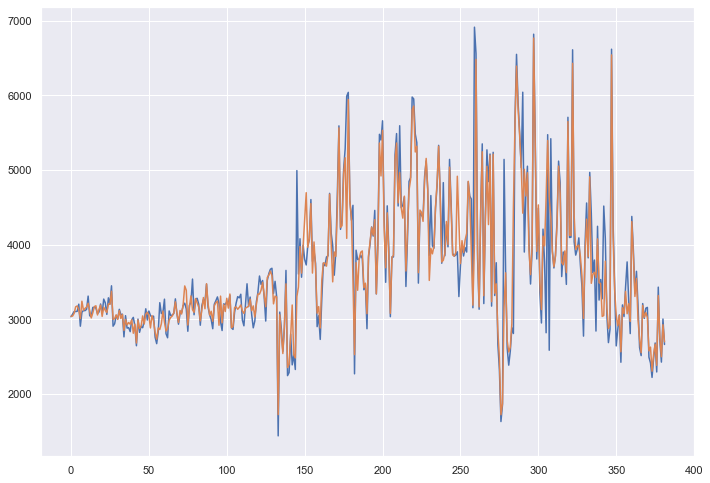

In [8]:
l = len(train_x)

x = np.arange(0, l)
y_true = []
y_pred = []

for idx in range( l ):
  # print( train_y[idx] )
  y_true.append( train_y[idx] )
  y_pred.append( clf.predict( train_x.iloc[idx].values.reshape(1, -1))[0] )
  # y_true = y_true.append( train_y[idx] )
  # y_pred = y_pred.append( clf.predict( train_x[idx] ) )

fig, ax = plt.subplots()
sns.lineplot(x=x, y=y_true, ax=ax)
sns.lineplot(x=x, y=y_pred, ax=ax)

MSE: 52600.43931697629
MAE: 52.59145538722585


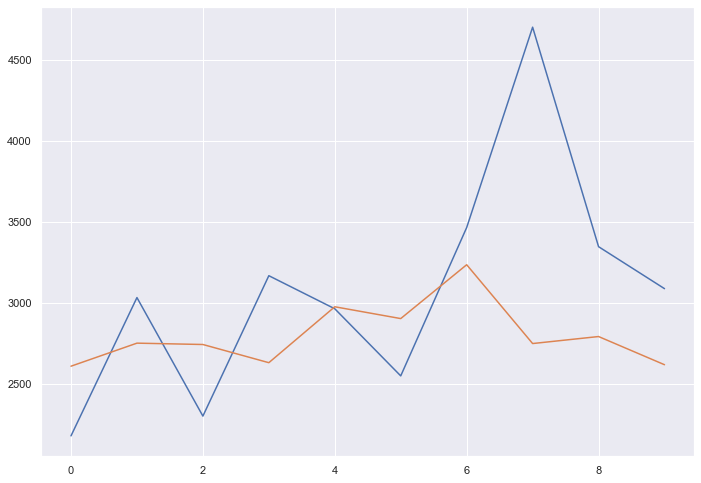

In [9]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

l = len(test_x)
x = np.arange(0, l)

y_true = []
y_pred = []

for idx in range( l ):
  # print( train_y[idx] )
  y_true.append( test_y.iloc[idx] )
  y_pred.append( clf.predict( test_x.iloc[idx].values.reshape(1, -1))[0] )
  # y_true = y_true.append( train_y[idx] )
  # y_pred = y_pred.append( clf.predict( train_x[idx] ) )

fig, ax = plt.subplots()
sns.lineplot(x=x, y=y_true, ax=ax)
sns.lineplot(x=x, y=y_pred, ax=ax)

print(f"MSE: {mean_squared_error(y_true, y_pred) / len(y_true)}") 
print(f"MAE: {mean_absolute_error(y_true, y_pred) / len(y_true)}") 

## 3-1 5_days

In [28]:
#df_dataset = pd.read_csv("data/2_df2_elec.csv", index_col=0)
df_dataset = pd.read_csv("data/2_df2_5day_elec.csv", index_col=0)
#df_dataset = pd.read_csv("data/2_df2_7day_elec.csv", index_col=0)
#df_dataset = pd.read_csv("data/2_df2_14day_elec.csv", index_col=0)

min_max_scaler = MinMaxScaler()

min_max_scaler.fit(df_dataset[[
        's_min', 's_max', 's_skew', 's_kurt',
        'd_min', 'd_max', 'd_skew', 'd_kurt',
        'i_min', 'i_max', 'i_skew', 'i_kurt',
        'c_min', 'c_max', 'c_skew', 'c_kurt',]])
print(f'min: {min_max_scaler.data_min_}')
print(f'max: {min_max_scaler.data_max_}')

df_dataset[[
        's_min', 's_max', 's_skew', 's_kurt',
        'd_min', 'd_max', 'd_skew', 'd_kurt',
        'i_min', 'i_max', 'i_skew', 'i_kurt',
        'c_min', 'c_max', 'c_skew', 'c_kurt',]] = min_max_scaler.fit_transform(
            df_dataset[[
        's_min', 's_max', 's_skew', 's_kurt',
        'd_min', 'd_max', 'd_skew', 'd_kurt',
        'i_min', 'i_max', 'i_skew', 'i_kurt',
        'c_min', 'c_max', 'c_skew', 'c_kurt',]]
        )

df_train = df_dataset.iloc[0:380]
df_test = df_dataset.iloc[380:390]

train_x = df_train.drop(columns=['OR', 'date'])
train_y = df_train['OR']

test_x = df_test.drop(columns=['OR', 'date'])
test_y = df_test['OR']

# We will try a lot of models later

from sklearn.model_selection import GridSearchCV                     
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR, LinearSVC, NuSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
classifiers = [
    KNeighborsRegressor(),
    SVR(),
    NuSVR(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    AdaBoostRegressor(),
    GradientBoostingRegressor()
]

# 模型訓練

from sklearn.model_selection import KFold             # 匯入 K 次交叉驗證工具
from sklearn.tree import DecisionTreeClassifier       # 匯入決策樹模型
from sklearn.metrics import accuracy_score            # 匯入準確度計算工具
from sklearn.metrics import mean_squared_error

kf = KFold(n_splits=5,                                # 設定 K 值
           random_state=1012,
           shuffle=True)
kf.get_n_splits(train_x)                              # 給予資料範圍


train_acc_list = []                                   # 儲存每次訓練模型的準確度
valid_acc_list = []                                   # 儲存每次驗證模型的準確度
best = []
avg = []

# train_index = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
# valid_index = [21, 22, 23, 24, 25, 26, 27, 28]

for clf in classifiers:
  for train_index, valid_index in kf.split(train_x):    # 每個迴圈都會產生不同部份的資料
    train_x_split = train_x.iloc[train_index]         # 產生訓練資料
    train_y_split = train_y.iloc[train_index]         # 產生訓練資料標籤
    valid_x_split = train_x.iloc[valid_index]         # 產生驗證資料
    valid_y_split = train_y.iloc[valid_index]         # 產生驗證資料標籤

    clf.fit(train_x_split, train_y_split)             # 訓練決策樹模型
    
    train_pred_y = clf.predict(train_x_split)         # 確認模型是否訓練成功
    train_acc = mean_squared_error(train_y_split, train_pred_y) / len(train_y_split)

    valid_pred_y = clf.predict(valid_x_split)         # 驗證模型是否訓練成功
    valid_acc = mean_squared_error(valid_y_split, valid_pred_y) / len(valid_y_split)
    
    train_acc_list.append(train_acc)
    valid_acc_list.append(valid_acc)

  print( clf.__class__.__name__ )        # print classifier's name
    # print("train MSE: ", train_acc)
    # print("test MSE: ", valid_acc)
    
  print((
    'average train MSE: {}\n' +
    '    min train MSE: {}\n' +
    '    max train MSE: {}\n' +
    'average valid MSE: {}\n' +
    '    min valid MSE: {}\n' +
    '    max valid MSE: {}').format(
    np.mean(train_acc_list),                          # 輸出平均訓練準確度
    np.min(train_acc_list),                           # 輸出最低訓練準確度
    np.max(train_acc_list),                           # 輸出最高訓練準確度
    np.mean(valid_acc_list),                          # 輸出平均驗證準確度
    np.min(valid_acc_list),                           # 輸出最低驗證準確度
    np.max(valid_acc_list)                            # 輸出最高驗證準確度
  ))

  best.append(np.min(valid_acc_list))
  avg.append(np.mean(valid_acc_list))

  print("="*30)

min: [ 2.49050000e+04  2.61090000e+04 -1.49324473e+00 -1.82123485e+00
  2.19130000e+04  2.34650000e+04 -1.49723102e+00 -1.83095613e+00
  2.71573000e+02  2.87253000e+02 -1.49624553e+00 -1.83060005e+00
  1.99353000e+02  2.11419000e+02 -1.49624056e+00 -1.81909140e+00]
max: [4.18850000e+04 4.28780000e+04 1.41891808e+00 2.41100738e-01
 3.77580000e+04 3.88440000e+04 1.35687172e+00 2.46308982e-01
 7.22834000e+02 7.36267000e+02 1.45709311e+00 2.45002903e-01
 4.00293000e+02 4.07732000e+02 1.44387644e+00 2.44996366e-01]
KNeighborsRegressor
average train MSE: 1454.624103445291
    min train MSE: 1189.164950657895
    max train MSE: 1565.46195074446
average valid MSE: 9414.631332409972
    min valid MSE: 7201.781606648198
    max valid MSE: 15189.529799168975
SVR
average train MSE: 2235.1804546785515
    min train MSE: 1189.164950657895
    max train MSE: 3102.9192974719153
average valid MSE: 10790.70048462341
    min valid MSE: 7201.781606648198
    max valid MSE: 15648.010908103368
NuSVR
average

In [29]:
# 模型訓練

from sklearn.model_selection import KFold             # 匯入 K 次交叉驗證工具
from sklearn.tree import DecisionTreeClassifier       # 匯入決策樹模型
from sklearn.metrics import accuracy_score            # 匯入準確度計算工具
from sklearn.metrics import mean_squared_error, mean_absolute_error

kf = KFold(n_splits=5,                                # 設定 K 值
           random_state=1012,
           shuffle=True)
kf.get_n_splits(train_x)                              # 給予資料範圍


train_acc_list = []                                   # 儲存每次訓練模型的準確度
valid_acc_list = []                                   # 儲存每次驗證模型的準確度
best = []
avg = []

# train_index = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
# valid_index = [21, 22, 23, 24, 25, 26, 27, 28]
clf = GradientBoostingRegressor(random_state=19477, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=1)

for train_index, valid_index in kf.split(train_x):    # 每個迴圈都會產生不同部份的資料
  train_x_split = train_x.iloc[train_index]         # 產生訓練資料
  train_y_split = train_y.iloc[train_index]         # 產生訓練資料標籤
  valid_x_split = train_x.iloc[valid_index]         # 產生驗證資料
  valid_y_split = train_y.iloc[valid_index]         # 產生驗證資料標籤

  clf.fit(train_x_split, train_y_split)             # 訓練決策樹模型
  
  train_pred_y = clf.predict(train_x_split)         # 確認模型是否訓練成功
  train_acc = mean_squared_error(train_y_split, train_pred_y) / len(train_y_split)

  valid_pred_y = clf.predict(valid_x_split)         # 驗證模型是否訓練成功
  valid_acc = mean_squared_error(valid_y_split, valid_pred_y) / len(valid_y_split)
  
  train_acc_list.append(train_acc)
  valid_acc_list.append(valid_acc)

print( clf.__class__.__name__ )        # print classifier's name
  # print("train MSE: ", train_acc)
  # print("test MSE: ", valid_acc)
  
print((
  'average train MSE: {}\n' +
  '    min train MSE: {}\n' +
  '    max train MSE: {}\n' +
  'average valid MSE: {}\n' +
  '    min valid MSE: {}\n' +
  '    max valid MSE: {}').format(
  np.mean(train_acc_list),                          # 輸出平均訓練準確度
  np.min(train_acc_list),                           # 輸出最低訓練準確度
  np.max(train_acc_list),                           # 輸出最高訓練準確度
  np.mean(valid_acc_list),                          # 輸出平均驗證準確度
  np.min(valid_acc_list),                           # 輸出最低驗證準確度
  np.max(valid_acc_list)                            # 輸出最高驗證準確度
))

best.append(np.min(valid_acc_list))
avg.append(np.mean(valid_acc_list))

print("="*30)

GradientBoostingRegressor
average train MSE: 27.677372637471798
    min train MSE: 24.122458772870317
    max train MSE: 36.515928016055526
average valid MSE: 7209.299449126539
    min valid MSE: 6070.050642162823
    max valid MSE: 10601.573176641807


# 3-1 Results

<AxesSubplot:>

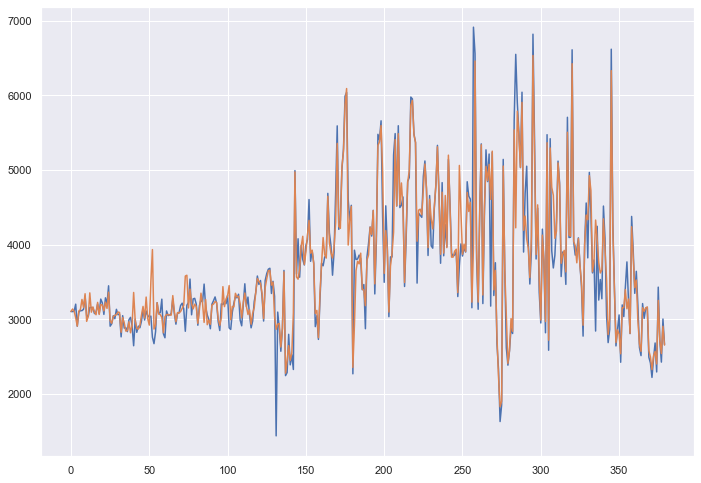

In [30]:
l = len(train_x)

x = np.arange(0, l)
y_true = []
y_pred = []

for idx in range( l ):
  # print( train_y[idx] )
  y_true.append( train_y[idx] )
  y_pred.append( clf.predict( train_x.iloc[idx].values.reshape(1, -1))[0] )
  # y_true = y_true.append( train_y[idx] )
  # y_pred = y_pred.append( clf.predict( train_x[idx] ) )

fig, ax = plt.subplots()
sns.lineplot(x=x, y=y_true, ax=ax)
sns.lineplot(x=x, y=y_pred, ax=ax)

MSE: 44322.99044822607
MAE: 49.7929769044575


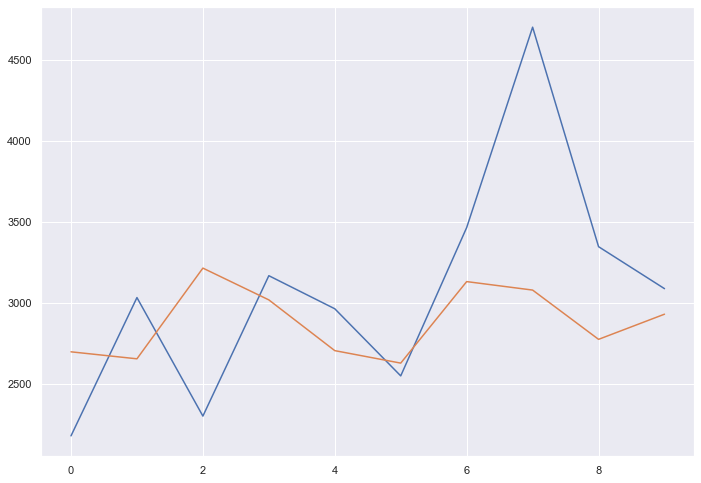

In [31]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

l = len(test_x)
x = np.arange(0, l)

y_true = []
y_pred = []

for idx in range( l ):
  # print( train_y[idx] )
  y_true.append( test_y.iloc[idx] )
  y_pred.append( clf.predict( test_x.iloc[idx].values.reshape(1, -1))[0] )
  # y_true = y_true.append( train_y[idx] )
  # y_pred = y_pred.append( clf.predict( train_x[idx] ) )

fig, ax = plt.subplots()
sns.lineplot(x=x, y=y_true, ax=ax)
sns.lineplot(x=x, y=y_pred, ax=ax)

print(f"MSE: {mean_squared_error(y_true, y_pred) / len(y_true)}") 
print(f"MAE: {mean_absolute_error(y_true, y_pred) / len(y_true)}") 

# 3-2 7_days

In [33]:
#df_dataset = pd.read_csv("data/2_df2_elec.csv", index_col=0)
#df_dataset = pd.read_csv("data/2_df2_5day_elec.csv", index_col=0)
df_dataset = pd.read_csv("data/2_df2_7day_elec.csv", index_col=0)
#df_dataset = pd.read_csv("data/2_df2_14day_elec.csv", index_col=0)

min_max_scaler = MinMaxScaler()

min_max_scaler.fit(df_dataset[[
        's_min', 's_max', 's_skew', 's_kurt',
        'd_min', 'd_max', 'd_skew', 'd_kurt',
        'i_min', 'i_max', 'i_skew', 'i_kurt',
        'c_min', 'c_max', 'c_skew', 'c_kurt',]])
print(f'min: {min_max_scaler.data_min_}')
print(f'max: {min_max_scaler.data_max_}')

df_dataset[[
        's_min', 's_max', 's_skew', 's_kurt',
        'd_min', 'd_max', 'd_skew', 'd_kurt',
        'i_min', 'i_max', 'i_skew', 'i_kurt',
        'c_min', 'c_max', 'c_skew', 'c_kurt',]] = min_max_scaler.fit_transform(
            df_dataset[[
        's_min', 's_max', 's_skew', 's_kurt',
        'd_min', 'd_max', 'd_skew', 'd_kurt',
        'i_min', 'i_max', 'i_skew', 'i_kurt',
        'c_min', 'c_max', 'c_skew', 'c_kurt',]]
        )

df_train = df_dataset.iloc[0:378]
df_test = df_dataset.iloc[378:388]

train_x = df_train.drop(columns=['OR', 'date'])
train_y = df_train['OR']

test_x = df_test.drop(columns=['OR', 'date'])
test_y = df_test['OR']

# We will try a lot of models later

from sklearn.model_selection import GridSearchCV                     
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR, LinearSVC, NuSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
classifiers = [
    KNeighborsRegressor(),
    SVR(),
    NuSVR(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    AdaBoostRegressor(),
    GradientBoostingRegressor()
]

# 模型訓練

from sklearn.model_selection import KFold             # 匯入 K 次交叉驗證工具
from sklearn.tree import DecisionTreeClassifier       # 匯入決策樹模型
from sklearn.metrics import accuracy_score            # 匯入準確度計算工具
from sklearn.metrics import mean_squared_error

kf = KFold(n_splits=5,                                # 設定 K 值
           random_state=1012,
           shuffle=True)
kf.get_n_splits(train_x)                              # 給予資料範圍


train_acc_list = []                                   # 儲存每次訓練模型的準確度
valid_acc_list = []                                   # 儲存每次驗證模型的準確度
best = []
avg = []

# train_index = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
# valid_index = [21, 22, 23, 24, 25, 26, 27, 28]

for clf in classifiers:
  for train_index, valid_index in kf.split(train_x):    # 每個迴圈都會產生不同部份的資料
    train_x_split = train_x.iloc[train_index]         # 產生訓練資料
    train_y_split = train_y.iloc[train_index]         # 產生訓練資料標籤
    valid_x_split = train_x.iloc[valid_index]         # 產生驗證資料
    valid_y_split = train_y.iloc[valid_index]         # 產生驗證資料標籤

    clf.fit(train_x_split, train_y_split)             # 訓練決策樹模型
    
    train_pred_y = clf.predict(train_x_split)         # 確認模型是否訓練成功
    train_acc = mean_squared_error(train_y_split, train_pred_y) / len(train_y_split)

    valid_pred_y = clf.predict(valid_x_split)         # 驗證模型是否訓練成功
    valid_acc = mean_squared_error(valid_y_split, valid_pred_y) / len(valid_y_split)
    
    train_acc_list.append(train_acc)
    valid_acc_list.append(valid_acc)

  print( clf.__class__.__name__ )        # print classifier's name
    # print("train MSE: ", train_acc)
    # print("test MSE: ", valid_acc)
    
  print((
    'average train MSE: {}\n' +
    '    min train MSE: {}\n' +
    '    max train MSE: {}\n' +
    'average valid MSE: {}\n' +
    '    min valid MSE: {}\n' +
    '    max valid MSE: {}').format(
    np.mean(train_acc_list),                          # 輸出平均訓練準確度
    np.min(train_acc_list),                           # 輸出最低訓練準確度
    np.max(train_acc_list),                           # 輸出最高訓練準確度
    np.mean(valid_acc_list),                          # 輸出平均驗證準確度
    np.min(valid_acc_list),                           # 輸出最低驗證準確度
    np.max(valid_acc_list)                            # 輸出最高驗證準確度
  ))

  best.append(np.min(valid_acc_list))
  avg.append(np.mean(valid_acc_list))

  print("="*30)

min: [ 2.49050000e+04  2.77160000e+04 -1.87178724e+00 -1.89337092e+00
  2.19130000e+04  2.47150000e+04 -1.86745068e+00 -1.89048552e+00
  2.71573000e+02  3.06312000e+02 -1.81248584e+00 -1.86699715e+00
  1.99353000e+02  2.25447000e+02 -1.80163133e+00 -1.82161505e+00]
max: [3.70140000e+04 4.28780000e+04 1.31423352e+00 1.77337521e+00
 3.24360000e+04 3.88440000e+04 1.29156662e+00 1.76477459e+00
 6.57236000e+02 7.36267000e+02 1.92877655e+00 1.93738211e+00
 3.63966000e+02 4.07732000e+02 1.37863876e+00 1.61934814e+00]
KNeighborsRegressor
average train MSE: 1347.0563072507316
    min train MSE: 1099.8636257181702
    max train MSE: 1452.7393175737902
average valid MSE: 7802.021446928408
    min valid MSE: 3908.4229191111112
    max valid MSE: 12355.722091412741
SVR
average train MSE: 2159.8155000646057
    min train MSE: 1099.8636257181702
    max train MSE: 3194.8505552461606
average valid MSE: 9881.323276975458
    min valid MSE: 3908.4229191111112
    max valid MSE: 15444.896581359437
NuSVR


In [34]:
# 模型訓練

from sklearn.model_selection import KFold             # 匯入 K 次交叉驗證工具
from sklearn.tree import DecisionTreeClassifier       # 匯入決策樹模型
from sklearn.metrics import accuracy_score            # 匯入準確度計算工具
from sklearn.metrics import mean_squared_error, mean_absolute_error

kf = KFold(n_splits=5,                                # 設定 K 值
           random_state=1012,
           shuffle=True)
kf.get_n_splits(train_x)                              # 給予資料範圍


train_acc_list = []                                   # 儲存每次訓練模型的準確度
valid_acc_list = []                                   # 儲存每次驗證模型的準確度
best = []
avg = []

# train_index = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
# valid_index = [21, 22, 23, 24, 25, 26, 27, 28]
clf = GradientBoostingRegressor(random_state=19477, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=1)

for train_index, valid_index in kf.split(train_x):    # 每個迴圈都會產生不同部份的資料
  train_x_split = train_x.iloc[train_index]         # 產生訓練資料
  train_y_split = train_y.iloc[train_index]         # 產生訓練資料標籤
  valid_x_split = train_x.iloc[valid_index]         # 產生驗證資料
  valid_y_split = train_y.iloc[valid_index]         # 產生驗證資料標籤

  clf.fit(train_x_split, train_y_split)             # 訓練決策樹模型
  
  train_pred_y = clf.predict(train_x_split)         # 確認模型是否訓練成功
  train_acc = mean_squared_error(train_y_split, train_pred_y) / len(train_y_split)

  valid_pred_y = clf.predict(valid_x_split)         # 驗證模型是否訓練成功
  valid_acc = mean_squared_error(valid_y_split, valid_pred_y) / len(valid_y_split)
  
  train_acc_list.append(train_acc)
  valid_acc_list.append(valid_acc)

print( clf.__class__.__name__ )        # print classifier's name
  # print("train MSE: ", train_acc)
  # print("test MSE: ", valid_acc)
  
print((
  'average train MSE: {}\n' +
  '    min train MSE: {}\n' +
  '    max train MSE: {}\n' +
  'average valid MSE: {}\n' +
  '    min valid MSE: {}\n' +
  '    max valid MSE: {}').format(
  np.mean(train_acc_list),                          # 輸出平均訓練準確度
  np.min(train_acc_list),                           # 輸出最低訓練準確度
  np.max(train_acc_list),                           # 輸出最高訓練準確度
  np.mean(valid_acc_list),                          # 輸出平均驗證準確度
  np.min(valid_acc_list),                           # 輸出最低驗證準確度
  np.max(valid_acc_list)                            # 輸出最高驗證準確度
))

best.append(np.min(valid_acc_list))
avg.append(np.mean(valid_acc_list))

print("="*30)

GradientBoostingRegressor
average train MSE: 25.282347106730633
    min train MSE: 22.705724262117407
    max train MSE: 27.666197325067806
average valid MSE: 8042.818312248732
    min valid MSE: 6386.868874360096
    max valid MSE: 11202.375582818853


# 3-2 Results

<AxesSubplot:>

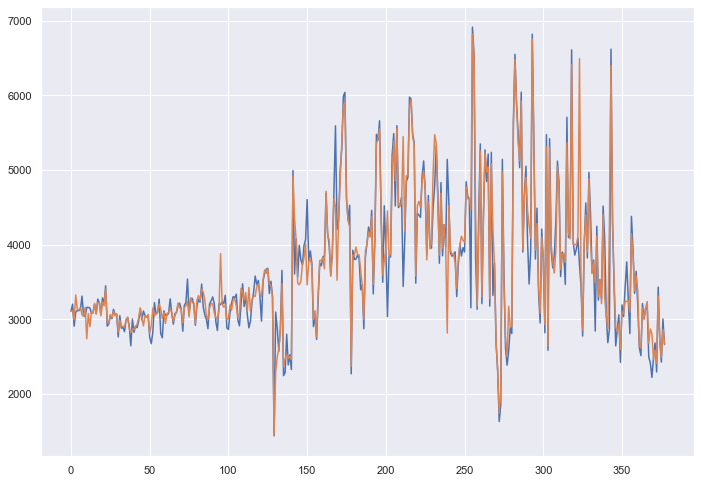

In [35]:
l = len(train_x)

x = np.arange(0, l)
y_true = []
y_pred = []

for idx in range( l ):
  # print( train_y[idx] )
  y_true.append( train_y[idx] )
  y_pred.append( clf.predict( train_x.iloc[idx].values.reshape(1, -1))[0] )
  # y_true = y_true.append( train_y[idx] )
  # y_pred = y_pred.append( clf.predict( train_x[idx] ) )

fig, ax = plt.subplots()
sns.lineplot(x=x, y=y_true, ax=ax)
sns.lineplot(x=x, y=y_pred, ax=ax)

MSE: 123168.04430906595
MAE: 84.63251758431555


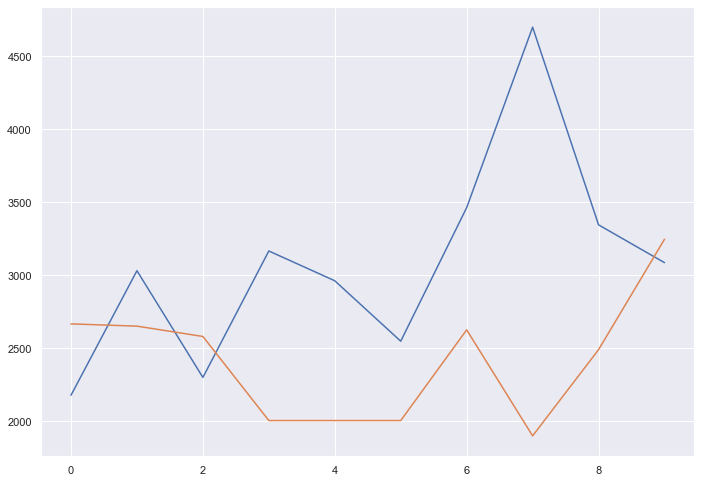

In [37]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

l = len(test_x)
x = np.arange(0, l)

y_true = []
y_pred = []

for idx in range( l ):
  # print( train_y[idx] )
  y_true.append( test_y.iloc[idx] )
  y_pred.append( clf.predict( test_x.iloc[idx].values.reshape(1, -1))[0] )
  # y_true = y_true.append( train_y[idx] )
  # y_pred = y_pred.append( clf.predict( train_x[idx] ) )

fig, ax = plt.subplots()
sns.lineplot(x=x, y=y_true, ax=ax)
sns.lineplot(x=x, y=y_pred, ax=ax)

print(f"MSE: {mean_squared_error(y_true, y_pred) / len(y_true)}") 
print(f"MAE: {mean_absolute_error(y_true, y_pred) / len(y_true)}") 

# 3-3 14_days

In [44]:
#df_dataset = pd.read_csv("data/2_df2_elec.csv", index_col=0)
#df_dataset = pd.read_csv("data/2_df2_5day_elec.csv", index_col=0)
#df_dataset = pd.read_csv("data/2_df2_7day_elec.csv", index_col=0)
df_dataset = pd.read_csv("data/2_df2_14day_elec.csv", index_col=0)

min_max_scaler = MinMaxScaler()

min_max_scaler.fit(df_dataset[[
        's_min', 's_max', 's_skew', 's_kurt',
        'd_min', 'd_max', 'd_skew', 'd_kurt',
        'i_min', 'i_max', 'i_skew', 'i_kurt',
        'c_min', 'c_max', 'c_skew', 'c_kurt',]])
print(f'min: {min_max_scaler.data_min_}')
print(f'max: {min_max_scaler.data_max_}')

df_dataset[[
        's_min', 's_max', 's_skew', 's_kurt',
        'd_min', 'd_max', 'd_skew', 'd_kurt',
        'i_min', 'i_max', 'i_skew', 'i_kurt',
        'c_min', 'c_max', 'c_skew', 'c_kurt',]] = min_max_scaler.fit_transform(
            df_dataset[[
        's_min', 's_max', 's_skew', 's_kurt',
        'd_min', 'd_max', 'd_skew', 'd_kurt',
        'i_min', 'i_max', 'i_skew', 'i_kurt',
        'c_min', 'c_max', 'c_skew', 'c_kurt',]]
        )

df_train = df_dataset.iloc[0:371]
df_test = df_dataset.iloc[371:381]

train_x = df_train.drop(columns=['OR', 'date'])
train_y = df_train['OR']

test_x = df_test.drop(columns=['OR', 'date'])
test_y = df_test['OR']

# We will try a lot of models later

from sklearn.model_selection import GridSearchCV                     
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR, LinearSVC, NuSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
classifiers = [
    KNeighborsRegressor(),
    SVR(),
    NuSVR(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    AdaBoostRegressor(),
    GradientBoostingRegressor()
]

# 模型訓練

from sklearn.model_selection import KFold             # 匯入 K 次交叉驗證工具
from sklearn.tree import DecisionTreeClassifier       # 匯入決策樹模型
from sklearn.metrics import accuracy_score            # 匯入準確度計算工具
from sklearn.metrics import mean_squared_error

kf = KFold(n_splits=5,                                # 設定 K 值
           random_state=1012,
           shuffle=True)
kf.get_n_splits(train_x)                              # 給予資料範圍


train_acc_list = []                                   # 儲存每次訓練模型的準確度
valid_acc_list = []                                   # 儲存每次驗證模型的準確度
best = []
avg = []

# train_index = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
# valid_index = [21, 22, 23, 24, 25, 26, 27, 28]

for clf in classifiers:
  for train_index, valid_index in kf.split(train_x):    # 每個迴圈都會產生不同部份的資料
    train_x_split = train_x.iloc[train_index]         # 產生訓練資料
    train_y_split = train_y.iloc[train_index]         # 產生訓練資料標籤
    valid_x_split = train_x.iloc[valid_index]         # 產生驗證資料
    valid_y_split = train_y.iloc[valid_index]         # 產生驗證資料標籤

    clf.fit(train_x_split, train_y_split)             # 訓練決策樹模型
    
    train_pred_y = clf.predict(train_x_split)         # 確認模型是否訓練成功
    train_acc = mean_squared_error(train_y_split, train_pred_y) / len(train_y_split)

    valid_pred_y = clf.predict(valid_x_split)         # 驗證模型是否訓練成功
    valid_acc = mean_squared_error(valid_y_split, valid_pred_y) / len(valid_y_split)
    
    train_acc_list.append(train_acc)
    valid_acc_list.append(valid_acc)

  print( clf.__class__.__name__ )        # print classifier's name
    # print("train MSE: ", train_acc)
    # print("test MSE: ", valid_acc)
    
  print((
    'average train MSE: {}\n' +
    '    min train MSE: {}\n' +
    '    max train MSE: {}\n' +
    'average valid MSE: {}\n' +
    '    min valid MSE: {}\n' +
    '    max valid MSE: {}').format(
    np.mean(train_acc_list),                          # 輸出平均訓練準確度
    np.min(train_acc_list),                           # 輸出最低訓練準確度
    np.max(train_acc_list),                           # 輸出最高訓練準確度
    np.mean(valid_acc_list),                          # 輸出平均驗證準確度
    np.min(valid_acc_list),                           # 輸出最低驗證準確度
    np.max(valid_acc_list)                            # 輸出最高驗證準確度
  ))

  best.append(np.min(valid_acc_list))
  avg.append(np.mean(valid_acc_list))

  print("="*30)

min: [ 2.49050000e+04  3.15120000e+04 -1.65393130e+00 -1.59963756e+00
  2.19130000e+04  2.86270000e+04 -1.46952707e+00 -1.63007927e+00
  2.71573000e+02  3.55022000e+02 -2.67008277e+00 -1.91858982e+00
  1.99353000e+02  2.43879000e+02 -1.52320608e+00 -1.66625812e+00]
max: [3.61020000e+04 4.28780000e+04 2.47434193e-01 2.04452223e+00
 3.21140000e+04 3.88440000e+04 2.10194463e-01 1.13012821e+00
 6.40554000e+02 7.36267000e+02 2.97454271e+00 7.75088204e+00
 3.54727000e+02 4.07732000e+02 1.34283578e+00 2.79757594e+00]
KNeighborsRegressor
average train MSE: 1329.7779643273452
    min train MSE: 1188.3731469577936
    max train MSE: 1455.7183756391526
average valid MSE: 8269.691669312297
    min valid MSE: 6242.851370666668
    max valid MSE: 10462.332344777209
SVR
average train MSE: 2179.2320962598897
    min train MSE: 1188.3731469577936
    max train MSE: 3308.9153693630674
average valid MSE: 10223.647305230115
    min valid MSE: 6242.851370666668
    max valid MSE: 15486.523551338487
NuSVR
a

In [45]:
# 模型訓練

from sklearn.model_selection import KFold             # 匯入 K 次交叉驗證工具
from sklearn.tree import DecisionTreeClassifier       # 匯入決策樹模型
from sklearn.metrics import accuracy_score            # 匯入準確度計算工具
from sklearn.metrics import mean_squared_error, mean_absolute_error

kf = KFold(n_splits=5,                                # 設定 K 值
           random_state=1012,
           shuffle=True)
kf.get_n_splits(train_x)                              # 給予資料範圍


train_acc_list = []                                   # 儲存每次訓練模型的準確度
valid_acc_list = []                                   # 儲存每次驗證模型的準確度
best = []
avg = []

# train_index = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
# valid_index = [21, 22, 23, 24, 25, 26, 27, 28]
clf = GradientBoostingRegressor(random_state=19477, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=1)

for train_index, valid_index in kf.split(train_x):    # 每個迴圈都會產生不同部份的資料
  train_x_split = train_x.iloc[train_index]         # 產生訓練資料
  train_y_split = train_y.iloc[train_index]         # 產生訓練資料標籤
  valid_x_split = train_x.iloc[valid_index]         # 產生驗證資料
  valid_y_split = train_y.iloc[valid_index]         # 產生驗證資料標籤

  clf.fit(train_x_split, train_y_split)             # 訓練決策樹模型
  
  train_pred_y = clf.predict(train_x_split)         # 確認模型是否訓練成功
  train_acc = mean_squared_error(train_y_split, train_pred_y) / len(train_y_split)

  valid_pred_y = clf.predict(valid_x_split)         # 驗證模型是否訓練成功
  valid_acc = mean_squared_error(valid_y_split, valid_pred_y) / len(valid_y_split)
  
  train_acc_list.append(train_acc)
  valid_acc_list.append(valid_acc)

print( clf.__class__.__name__ )        # print classifier's name
  # print("train MSE: ", train_acc)
  # print("test MSE: ", valid_acc)
  
print((
  'average train MSE: {}\n' +
  '    min train MSE: {}\n' +
  '    max train MSE: {}\n' +
  'average valid MSE: {}\n' +
  '    min valid MSE: {}\n' +
  '    max valid MSE: {}').format(
  np.mean(train_acc_list),                          # 輸出平均訓練準確度
  np.min(train_acc_list),                           # 輸出最低訓練準確度
  np.max(train_acc_list),                           # 輸出最高訓練準確度
  np.mean(valid_acc_list),                          # 輸出平均驗證準確度
  np.min(valid_acc_list),                           # 輸出最低驗證準確度
  np.max(valid_acc_list)                            # 輸出最高驗證準確度
))

best.append(np.min(valid_acc_list))
avg.append(np.mean(valid_acc_list))

print("="*30)

GradientBoostingRegressor
average train MSE: 32.15132605335724
    min train MSE: 29.706728555179755
    max train MSE: 38.23598365116885
average valid MSE: 7917.615374901837
    min valid MSE: 5142.417243269015
    max valid MSE: 9582.581266559004


# 3-3 Results

<AxesSubplot:>

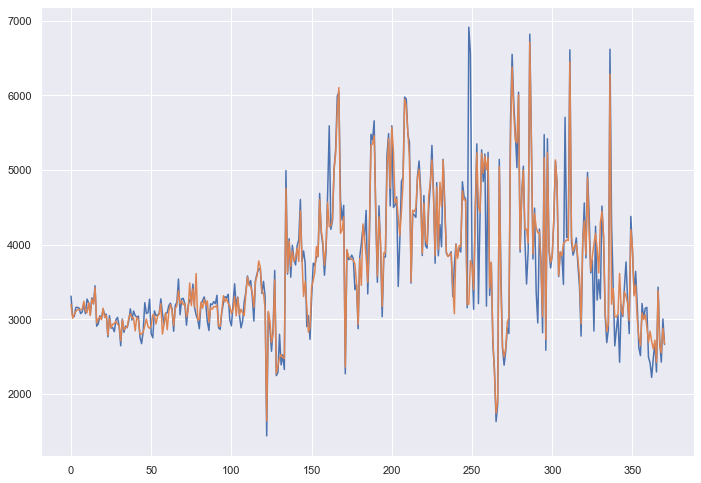

In [46]:
l = len(train_x)

x = np.arange(0, l)
y_true = []
y_pred = []

for idx in range( l ):
  # print( train_y[idx] )
  y_true.append( train_y[idx] )
  y_pred.append( clf.predict( train_x.iloc[idx].values.reshape(1, -1))[0] )
  # y_true = y_true.append( train_y[idx] )
  # y_pred = y_pred.append( clf.predict( train_x[idx] ) )

fig, ax = plt.subplots()
sns.lineplot(x=x, y=y_true, ax=ax)
sns.lineplot(x=x, y=y_pred, ax=ax)

MSE: 54593.4239607197
MAE: 54.712657234869006


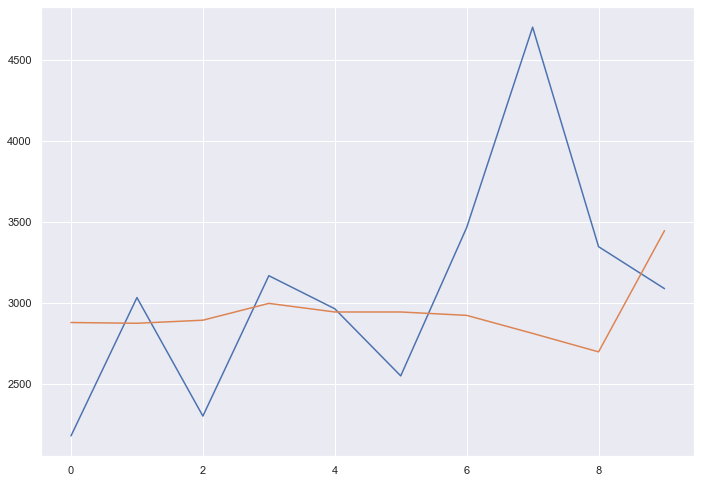

In [47]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

l = len(test_x)
x = np.arange(0, l)

y_true = []
y_pred = []

for idx in range( l ):
  # print( train_y[idx] )
  y_true.append( test_y.iloc[idx] )
  y_pred.append( clf.predict( test_x.iloc[idx].values.reshape(1, -1))[0] )
  # y_true = y_true.append( train_y[idx] )
  # y_pred = y_pred.append( clf.predict( train_x[idx] ) )

fig, ax = plt.subplots()
sns.lineplot(x=x, y=y_true, ax=ax)
sns.lineplot(x=x, y=y_pred, ax=ax)

print(f"MSE: {mean_squared_error(y_true, y_pred) / len(y_true)}") 
print(f"MAE: {mean_absolute_error(y_true, y_pred) / len(y_true)}") 